<a href="https://colab.research.google.com/github/abaskon/Thesis/blob/main/GPR_and_DBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install arch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 918.2/918.2 kB 16.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
from statsmodels.tsa.arima_model import ARIMA
import arch
from arch import arch_model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



In [3]:
dbi1 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI1985-2004.csv")
dbi2 = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/DBI2004-today.csv")

dbi1['Price'] = dbi1['Price'].str.replace(',', '').astype(float)
dbi2['Price'] = dbi2['Price'].str.replace(',', '').astype(float)

In [4]:
GPR = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_daily_recent.csv")
GPRE = pd.read_csv("https://raw.githubusercontent.com/abaskon/Thesis/main/Data/data_gpr_export.csv")

GPR['GPRD'] = GPR['GPRD'].str.replace(',', '').astype(float)

In [5]:
dbi1['Date'] = pd.to_datetime(dbi1['Date'], format='%m/%d/%Y')
dbi2['Date'] = pd.to_datetime(dbi2['Date'], format='%m/%d/%Y')

In [6]:
GPR = GPR.rename(columns={'DAY': 'Date'})

In [7]:
GPR['Date'] = GPR['Date'].astype(str)
# Convert the 'Date' column to datetime format
GPR['Date'] = pd.to_datetime(GPR['Date'], format='%Y%m%d')

# Convert the 'Date' column to the '%m/%d/%Y' format
GPR['Date'] = GPR['Date'].dt.strftime('%Y-%m-%d')
GPR['Date'] = pd.to_datetime(GPR['Date'])


In [8]:
dbi1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4999 non-null   datetime64[ns]
 1   Price     4999 non-null   float64       
 2   Open      4999 non-null   object        
 3   High      4999 non-null   object        
 4   Low       4999 non-null   object        
 5   Vol.      0 non-null      float64       
 6   Change %  4999 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 273.5+ KB


In [9]:
GPR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13993 entries, 0 to 13992
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         13993 non-null  datetime64[ns]
 1   N10D         13993 non-null  int64         
 2   GPRD         13993 non-null  float64       
 3   GPRD_ACT     13993 non-null  object        
 4   GPRD_THREAT  13993 non-null  float64       
 5   date         13993 non-null  object        
 6   GPRD_MA30    13993 non-null  float64       
 7   GPRD_MA7     13993 non-null  float64       
 8   event        11 non-null     object        
 9   var_name     9 non-null      object        
 10  var_label    9 non-null      object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 1.2+ MB


In [10]:
# concatenate the two tables based on the 'date' column
DBI = pd.concat([dbi1, dbi2]).drop_duplicates(subset='Date')
DBI = DBI.sort_values(by='Date', ascending=True)

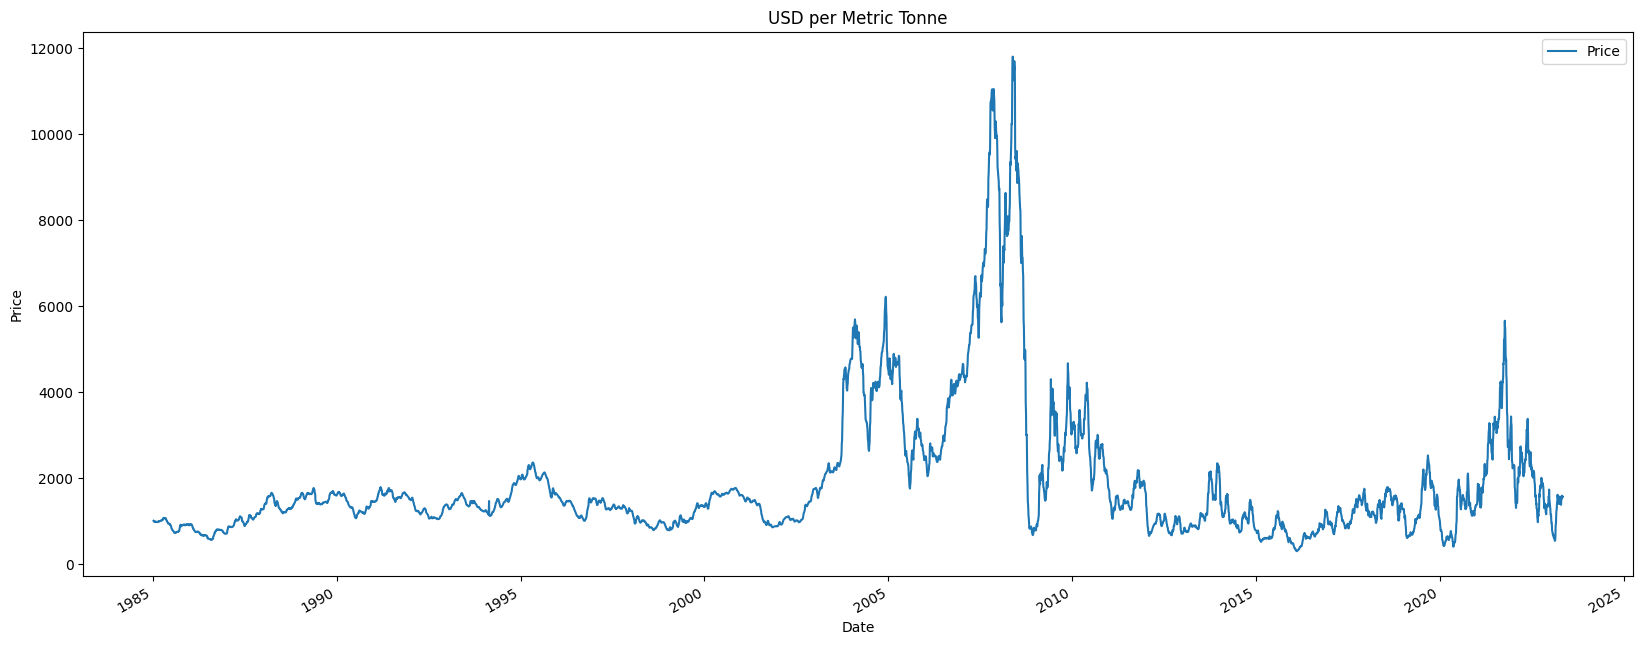

In [11]:
def plotgraph(df, x, y):
    df[y] = pd.to_numeric(df[y])
    df.plot(x=x, y=y, figsize=(20, 8))
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('USD per Metric Tonne')
    plt.show()
plotgraph(DBI,'Date','Price')

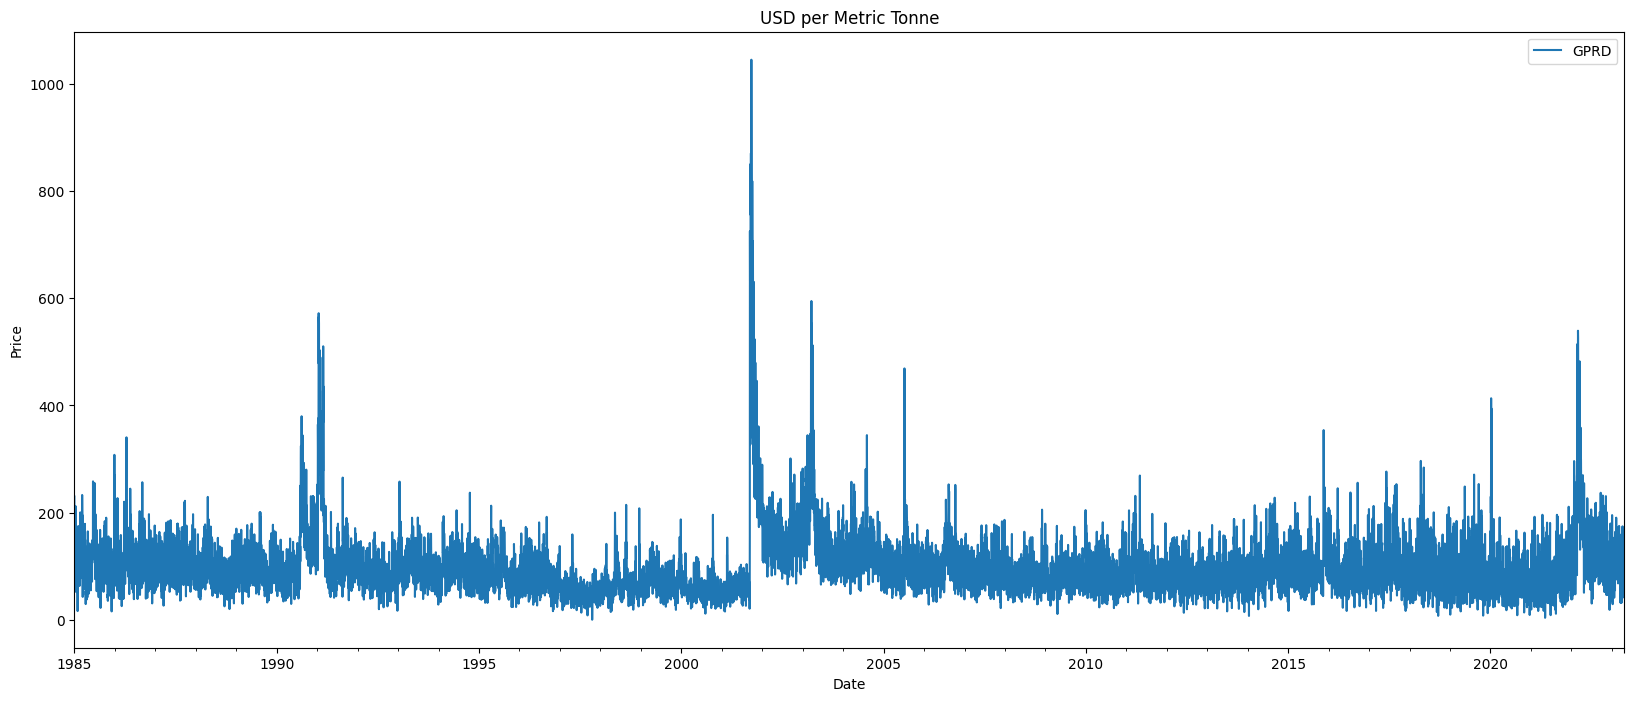

In [12]:
plotgraph(GPR,'Date','GPRD')

In [13]:
# Plotly line plot
fig = go.Figure(data=[go.Scatter(x=DBI['Date'], y=DBI['Price'])])
fig.show()


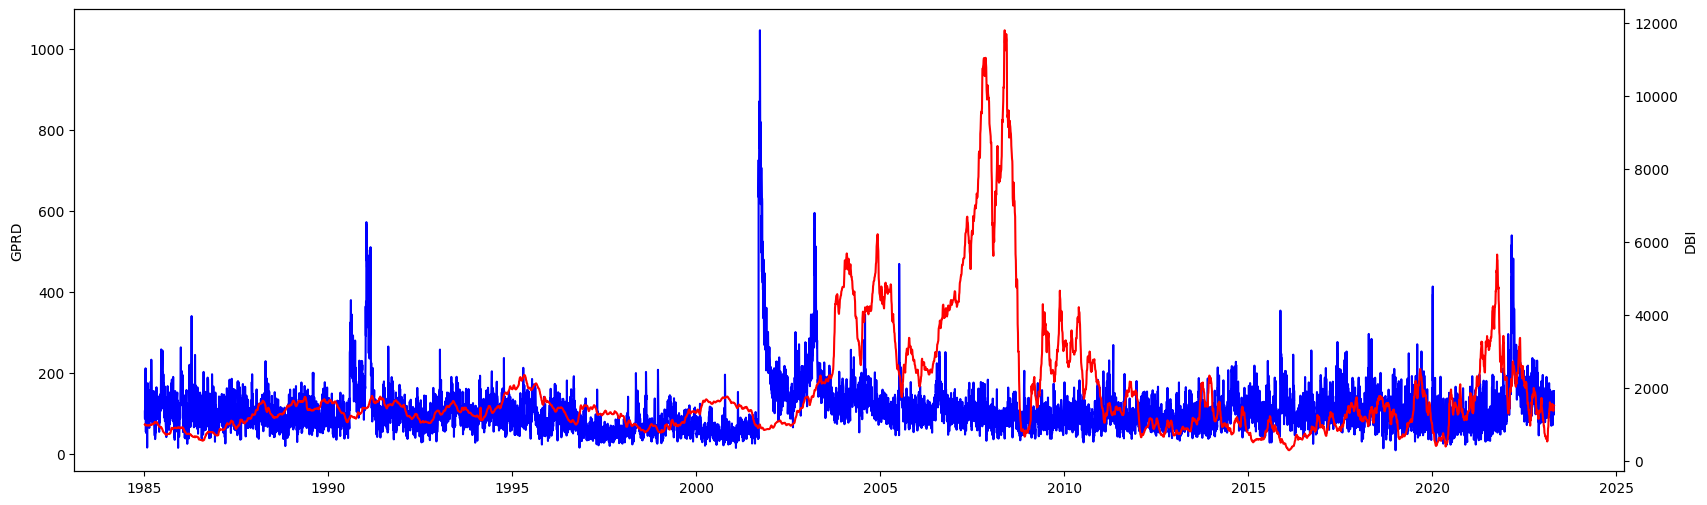

In [14]:

# Merge the two DataFrames based on the common x value
merged_df = pd.merge(DBI, GPR, on='Date')

# select every third row
#merged_df = merged_df.iloc[::10, :]

import pandas as pd
import matplotlib.pyplot as plt


# create a figure and axis objects
fig, ax1 = plt.subplots(figsize=(20, 6))

# plot the 'A' column on the first y-axis
ax1.plot(merged_df.Date, merged_df['GPRD'], color='blue')
ax1.set_ylabel('GPRD')

# create a second y-axis object
ax2 = ax1.twinx()

# plot the 'B' column on the second y-axis
ax2.plot(merged_df.Date, merged_df['Price'], color='red')
ax2.set_ylabel('DBI')

# normalize the two y-axis scales


# display the plot
plt.show()

<ipython-input-15-ff7a147d4bfd>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



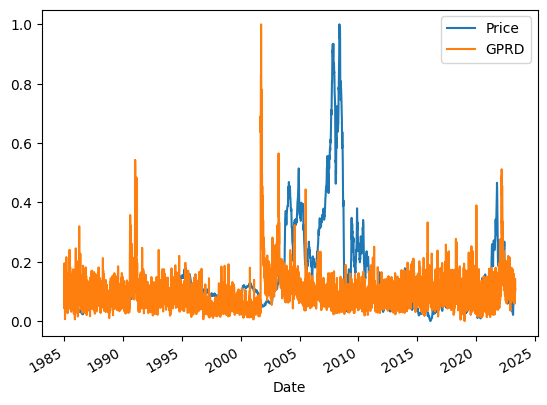

In [15]:

df = merged_df[['Date','Price','GPRD']]
# Normalize col1 and col2 columns using MinMaxScaler
scaler = MinMaxScaler()
df[['Price', 'GPRD']] = scaler.fit_transform(df[['Price', 'GPRD']])

# Plot col1 and col2 columns
df.plot(x='Date', y=['Price', 'GPRD'])
plt.show()

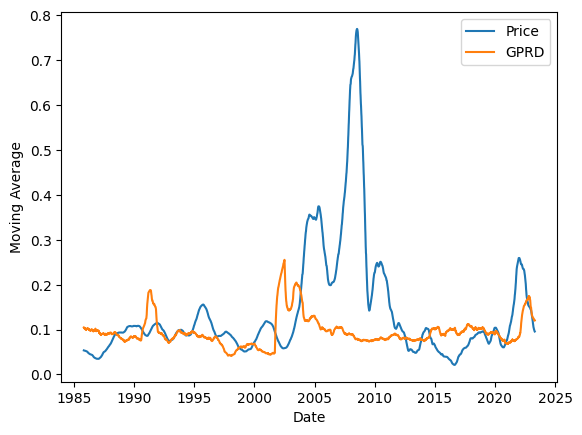

In [16]:
df.set_index('Date', inplace=True)

# calculate the rolling mean of Price and GPRD with a window of 30 days
rolling_mean = df.rolling(window=200).mean()

# plot the rolling mean of Price and GPRD with Date as x-axis
plt.plot(rolling_mean['Price'], label='Price')
plt.plot(rolling_mean['GPRD'], label='GPRD')
plt.xlabel('Date')
plt.ylabel('Moving Average')
plt.legend()
plt.show()

Correlation coefficient: -0.00780488422627485


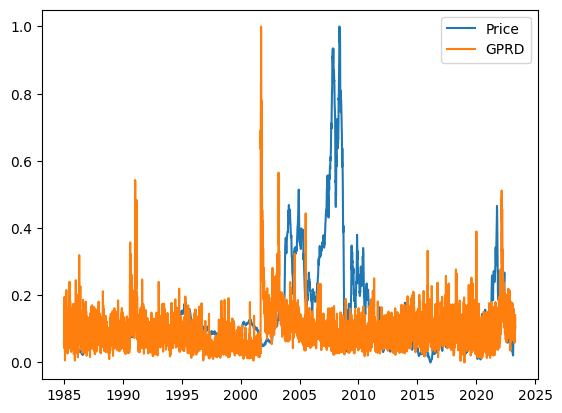

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Calculate the correlation coefficient
corr, _ = pearsonr(df['Price'], df['GPRD'])
print('Correlation coefficient:', corr)

# Plot the graph
plt.plot(df.index, df['Price'], label='Price')
plt.plot(df.index, df['GPRD'], label='GPRD')
plt.legend()
plt.show()

In [18]:
rolling_mean = rolling_mean.fillna(0)

Correlation coefficient: 0.07126486753808574


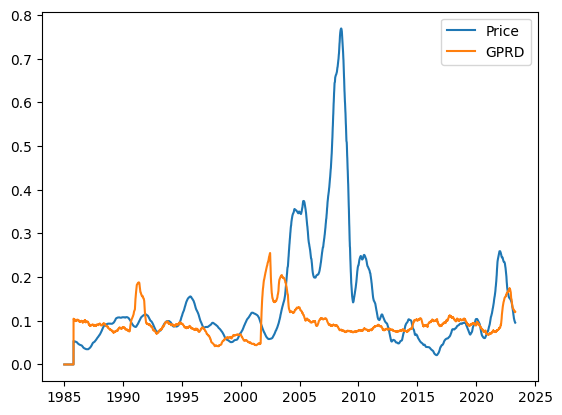

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

rolling_mean.fillna(0)
# Calculate the correlation coefficient
corr, _ = pearsonr(rolling_mean['Price'], rolling_mean['GPRD'])
print('Correlation coefficient:', corr)

# Plot the graph
plt.plot(rolling_mean.index, rolling_mean['Price'], label='Price')
plt.plot(rolling_mean.index, rolling_mean['GPRD'], label='GPRD')
plt.legend()
plt.show()

In [20]:
df

,Price,GPRD
Date,,
1985-01-07,0.061593,0.092481
1985-01-08,0.061419,0.075195
1985-01-09,0.061245,0.108010
1985-01-10,0.059941,0.126570
1985-01-11,0.060028,0.082385
...,...,...
2023-04-18,0.093715,0.083292
2023-04-19,0.094062,0.133567
2023-04-20,0.099278,0.086072


In [21]:
corr_p = df.corr(method='pearson')
corr_p

,Price,GPRD
Price,1.000000,-0.007805
GPRD,-0.007805,1.000000


In [22]:
corr_s = df.corr(method='spearman')
corr_s

,Price,GPRD
Price,1.000000,0.047779
GPRD,0.047779,1.000000


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Data from Yahoo Finance
EconomyData = pd.read_csv('C:/Users/lenovo/Desktop/PythonPrac/Mutivariate/DataEconomy.csv')
EconomyData.head()

,Date,USDINRClose,CrudeOil,Gold
0,2017-06-12,64.394997,44.740002,1254.000000
1,2017-06-19,64.498001,43.009998,1256.199951
2,2017-06-26,64.606796,46.040001,1240.699951
3,2017-07-03,64.611702,44.230000,1208.599976
4,2017-07-10,64.267303,46.540001,1226.599976


In [ ]:
print(EconomyData.describe())

       USDINRClose    CrudeOil         Gold
count   158.000000  158.000000   158.000000
mean     69.242982   55.498164  1369.722785
std       3.619740   11.833905   148.895295
min      63.333000   16.670000  1176.500000
25%      65.183924   51.262501  1271.674988
50%      69.779999   56.700001  1312.899964
75%      71.515328   63.125000  1472.849975
max      77.139999   74.339996  1767.900024


In [ ]:
print(EconomyData.isnull().sum())

Date           623
USDINRClose    623
CrudeOil       623
Gold           623
dtype: int64


In [ ]:
EconomyData.dropna(inplace=True)
print(EconomyData.isnull().sum())

Date           0
USDINRClose    0
CrudeOil       0
Gold           0
dtype: int64


In [ ]:
EconomyData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 157
Data columns (total 4 columns):
Date           158 non-null object
USDINRClose    158 non-null float64
CrudeOil       158 non-null float64
Gold           158 non-null float64
dtypes: float64(3), object(1)
memory usage: 6.2+ KB


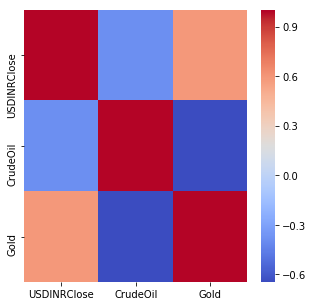

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(EconomyData.corr(),cmap='coolwarm');

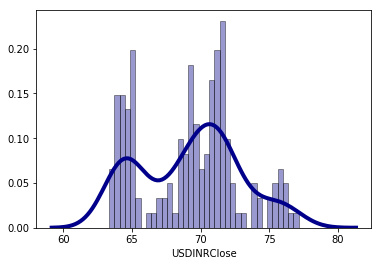

In [ ]:
sns.distplot(EconomyData['USDINRClose'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

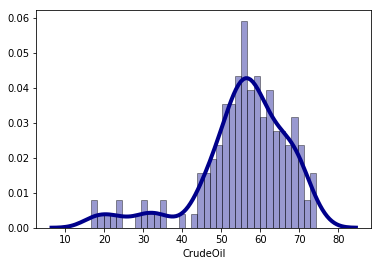

In [ ]:
sns.distplot(EconomyData['CrudeOil'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

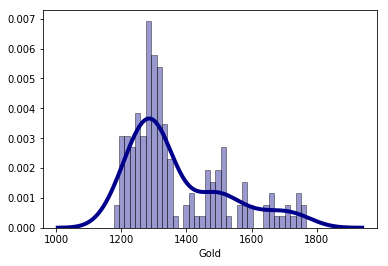

In [ ]:
sns.distplot(EconomyData['Gold'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [ ]:
EconomyData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, 2017-06-12 to 2020-06-15
Data columns (total 3 columns):
USDINRClose    158 non-null float64
CrudeOil       158 non-null float64
Gold           158 non-null float64
dtypes: float64(3)
memory usage: 4.9+ KB


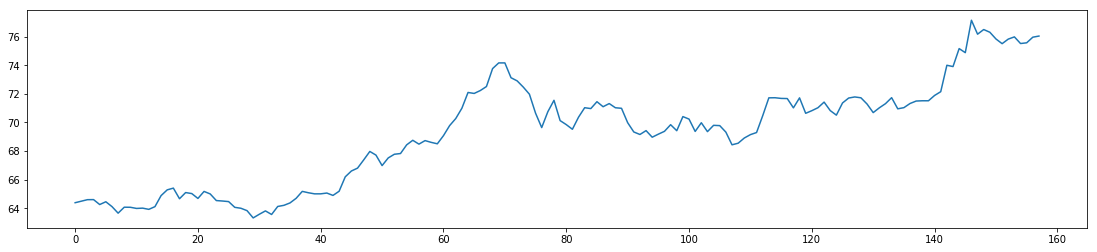

In [ ]:
EconomyData['USDINRClose'].plot(figsize=(19, 4))
plt.show()

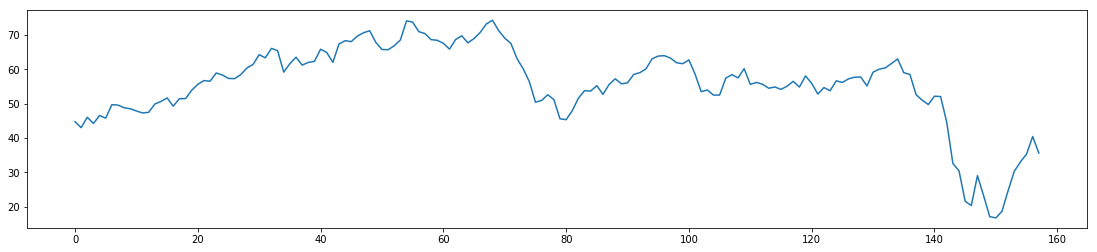

In [ ]:
EconomyData['CrudeOil'].plot(figsize=(19, 4))
plt.show()

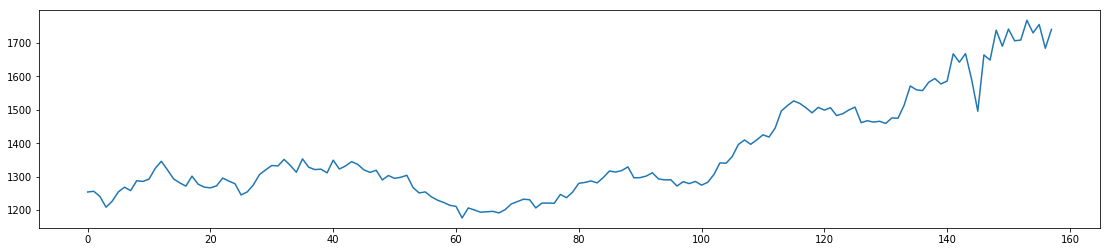

In [ ]:
EconomyData['Gold'].plot(figsize=(19, 4))
plt.show()

In [ ]:
EconomyData = EconomyData.set_index(['Date'])
EconomyData.head(5)

,USDINRClose,CrudeOil,Gold
Date,,,
2017-06-12,64.394997,44.740002,1254.000000
2017-06-19,64.498001,43.009998,1256.199951
2017-06-26,64.606796,46.040001,1240.699951
2017-07-03,64.611702,44.230000,1208.599976
2017-07-10,64.267303,46.540001,1226.599976


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [ ]:
#testing for causality with granger's causality test
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(EconomyData, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(EconomyData[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(EconomyData, variables = EconomyData.columns)
#If a given p-value is < significance level (0.05), then, the corresponding X series (column) causes the Y (row).

,USDINRClose_x,CrudeOil_x,Gold_x
USDINRClose_y,1.0000,0.0466,0.1383
CrudeOil_y,0.0104,1.0000,0.0001
Gold_y,0.1219,0.0078,1.0000


USDINRCLOSE and CrudeOil show the causation factor but not gold. still being considered.

In [ ]:
#cointegration test to find statistical relation amongst variables.
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(EconomyData, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(EconomyData,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(EconomyData.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(EconomyData)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
USDINRClose ::  15.09     > 24.2761   =>   False
CrudeOil ::  6.53      > 12.3212   =>   False
Gold   ::  1.0       > 4.1296    =>   False


If there is cointegration:
1.    Implies that the series in question are related and therefore can be combined in a linear fashion.
2.  That is, even if there are shocks in the short run, which may affect movement in the individual series, they would converge with time (in the long run).
3.    Estimate both long-run and short-run models.
4. The estimation will require the use of vector autoregressive (VAR) model and vector error correction model (VECM) analysis.

If there is no cointegration:
1.    Estimate only the short-run model, which is VAR and not VECM.
source : http://cruncheconometrix.blogspot.com/2018/03/time-series-analysis-lecture-4-part-1.html

In [ ]:
nobs = 4
EconomyData_train, EconomyData_test = EconomyData[0:-nobs], EconomyData[-nobs:]

# Check size
print(EconomyData_train.shape)  # (154, 3)
print(EconomyData_test.shape)  # (4, 3)

(154, 3)
(4, 3)


In [ ]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [ ]:
# ADF Test on each column
for name, column in EconomyData_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "USDINRClose" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -0.4539
 No. Lags Chosen       = 0
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.9007. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "CrudeOil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.6594
 No. Lags Chosen       = 9
 Critical value 1%     = -3.477
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.4521. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Gold" 
    -----------------------------------------------
 Null Hypothesis: Data 

In [ ]:
#series needs to be stationary hence differencing it.
#1st difference
EconomyData_train = EconomyData_train.diff().dropna()


In [ ]:
# ADF Test on each column
for name, column in EconomyData_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "USDINRClose" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -12.0304
 No. Lags Chosen       = 0
 Critical value 1%     = -3.474
 Critical value 5%     = -2.881
 Critical value 10%    = -2.577
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "CrudeOil" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -4.106
 No. Lags Chosen       = 8
 Critical value 1%     = -3.477
 Critical value 5%     = -2.882
 Critical value 10%    = -2.578
 => P-Value = 0.0009. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Gold" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Le

Now after 1st order of differencing as per the ADF test where p value < 0.05 it can be said the series is stationary

In [ ]:
model = VAR(EconomyData_train)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

C:\Program Files (x86)\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-MON will be used.
  % freq, ValueWarning)


Lag Order = 1
AIC :  7.585526367576263
BIC :  7.824253777116759
FPE :  1969.554848934887
HQIC:  7.68250573292433 

Lag Order = 2
AIC :  7.558264740494836
BIC :  7.977886439654528
FPE :  1916.8993648149367
HQIC:  7.728736877646785 

Lag Order = 3
AIC :  7.5677119123714025
BIC :  8.169838971190654
FPE :  1935.8583333662293
HQIC:  7.812336997278004 

Lag Order = 4
AIC :  7.596681191997047
BIC :  8.382949017043174
FPE :  1994.2346220164366
HQIC:  7.9161288111983135 

Lag Order = 5
AIC :  7.60541065998318
BIC :  8.577479505528299
FPE :  2014.1559979330214
HQIC:  8.000359986491791 

Lag Order = 6
AIC :  7.685673920195267
BIC :  8.84522941302784
FPE :  2186.453905942315
HQIC:  8.156813893179809 

Lag Order = 7
AIC :  7.760492179645749
BIC :  9.109245857952256
FPE :  2362.3917353224942
HQIC:  8.308521687992851 

Lag Order = 8
AIC :  7.817028027391899
BIC :  9.35671789416116
FPE :  2508.56298333459
HQIC:  8.442656097226902 

Lag Order = 9
AIC :  7.878965593128216
BIC :  9.61135668454755
FPE :  

In [ ]:
x = model.select_order(maxlags=12)
x.summary()


,AIC,BIC,FPE,HQIC
0,7.737,7.800*,2291.,7.762*
1,7.720,7.971,2252.,7.822
2,7.682*,8.121,2170.*,7.861
3,7.684,8.311,2174.,7.939
4,7.692,8.507,2194.,8.023
5,7.694,8.698,2202.,8.102
6,7.788,8.980,2422.,8.272
7,7.851,9.232,2589.,8.412
8,7.898,9.467,2724.,8.536
9,7.931,9.688,2827.,8.645


In [ ]:
model_fitted = model.fit(2)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 16, Jun, 2020
Time:                     11:00:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    7.97789
Nobs:                     151.000    HQIC:                   7.72874
Log likelihood:          -1192.43    FPE:                    1916.90
AIC:                      7.55826    Det(Omega_mle):         1673.24
--------------------------------------------------------------------
Results for equation USDINRClose
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                  0.083402         0.047675            1.749           0.080
L1.USDINRClose         0.016028         0.082904            0.193           0.847
L1.CrudeOil            0.024353         0.016700  

In [ ]:
#to check if any serial pattern is still left in the residuals durbin watson statistical test can be performed.
#The value of this statistic can vary between 0 and 4. The closer it is to the value 2, 
#then there is no significant serial correlation.
#The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(EconomyData_train.columns, out):
    print(col, ':', round(val, 2))

USDINRClose : 1.96
CrudeOil : 2.02
Gold : 1.92


As the values are closer to 2 no significant correlation.

In [ ]:
#forecasting
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = EconomyData_train.values[-lag_order:]
forecast_input

2


array([[ 0.319496,  6.049999,  2.199952],
       [ 0.154503,  5.61    , 59.300048]])

In [ ]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=EconomyData.index[-nobs:], columns=EconomyData.columns + '_2d')
df_forecast

,USDINRClose_2d,CrudeOil_2d,Gold_2d
Date,,,
2020-05-25,0.159604,0.982907,-4.079060
2020-06-01,0.090039,-1.722465,6.828139
2020-06-08,0.056952,-0.285623,3.875078
2020-06-15,0.050888,-0.237223,2.864957


In [ ]:
#inverting the values from differencing
def invert_transformation(EconomyData_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = EconomyData_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_2d'] = (EconomyData_train[col].iloc[-1]-EconomyData_train[col].iloc[-2]) + EconomyData_train[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = EconomyData_train[col].iloc[-1] + df_fc[str(col)+'_2d'].cumsum()
    return df_fc

In [ ]:
df_results = invert_transformation(EconomyData_train, df_forecast)        
df_results.loc[:, ['USDINRClose_forecast', 'CrudeOil_forecast', 'Gold_forecast']]

,USDINRClose_forecast,CrudeOil_forecast,Gold_forecast
Date,,,
2020-05-25,0.314107,6.592907,55.220988
2020-06-01,0.404146,4.870442,62.049128
2020-06-08,0.461098,4.584819,65.924206
2020-06-15,0.511986,4.347596,68.789162


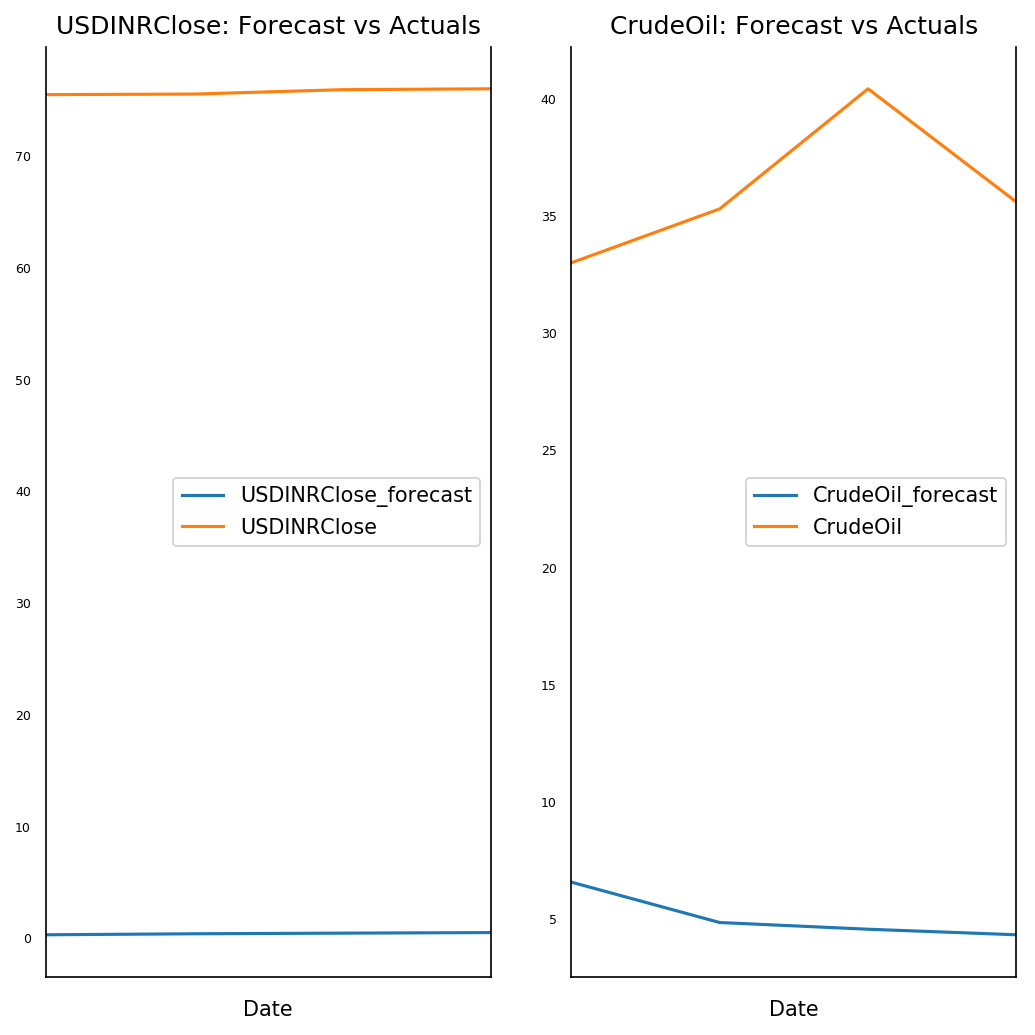

In [ ]:
fig, axes = plt.subplots(nrows=int(len(EconomyData.columns)/2), ncols=2, dpi=150, figsize=(7,7))
for i, (col,ax) in enumerate(zip(EconomyData.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    EconomyData_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    return({'rmse':rmse})

print('Forecast Accuracy of: USDINRClose')
accuracy_prod = forecast_accuracy(df_results['USDINRClose_forecast'].values, EconomyData_test['USDINRClose'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: CrudeOil')
accuracy_prod = forecast_accuracy(df_results['CrudeOil_forecast'].values, EconomyData_test['CrudeOil'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))

print('\nForecast Accuracy of: Gold')
accuracy_prod = forecast_accuracy(df_results['Gold_forecast'].values, EconomyData_test['Gold'])
for k, v in accuracy_prod.items():
    print((k), ': ', round(v,4))


Forecast Accuracy of: USDINRClose
rmse :  75.3445

Forecast Accuracy of: CrudeOil
rmse :  31.159

Forecast Accuracy of: Gold
rmse :  1664.7136


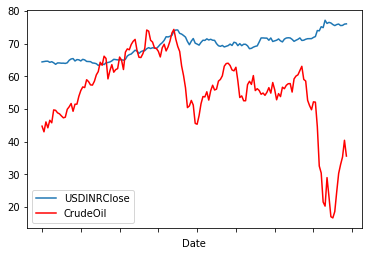

In [ ]:
ax = plt.gca()

EconomyData1.plot(kind='line',x='Date',y='USDINRClose',ax=ax)
EconomyData1.plot(kind='line',x='Date',y='CrudeOil', color='red', ax=ax)
#EconomyData1.plot(kind='line',x='Date',y='Gold', color='yellow', ax=ax)

plt.show()

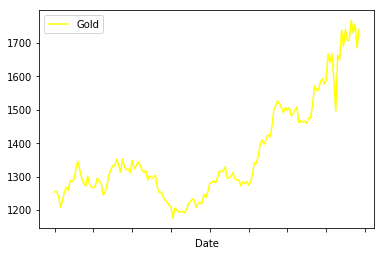

In [ ]:
ax = plt.gca()

EconomyData1.plot(kind='line',x='Date',y='Gold',ax=ax,color="yellow")
plt.show()